In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from utils import *

In [3]:
from dataset import *

In [4]:
from data_module import *

In [5]:
plt.rcParams['figure.figsize'] = (14,10)
font = {'family' : 'DejaVu Sans',  'weight' : 'normal',  'size'  : 22}
plt.rc('font', **font)

In [6]:
df = pd.read_csv('dataset_strat.csv')

In [7]:
df

,filename,width,height,class,bboxes,total_bolts,fold
0,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[3530, 2445, 3730, 2644]]",1,0
1,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[351, 319, 546, 519]]",1,0
2,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[287, 1023, 486, 1227], [1404, 2490, 1604, 26...",3,0
3,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[272, 1018, 466, 1212], [1399, 2495, 1599, 26...",3,0
4,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[356, 389, 561, 588]]",1,0
...,...,...,...,...,...,...,...
102,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[326, 254, 526, 459], [2522, 269, 2722, 469],...",9,4
103,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[1484, 529, 1684, 723]]",1,4
104,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[336, 324, 536, 524]]",1,4
105,/mnt/hdd/astamoulakatos/NMIS/images/2021-10-29...,4032,3024,Bolt,"[[466, 469, 671, 663]]",1,4


In [8]:
df["bboxes"] = df["bboxes"].apply(eval)

In [9]:
test_dataset = BoltDataset(df, get_train_transforms(), 'test')

21


(3024, 4032, 3)
torch.Size([3, 2048, 2048])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


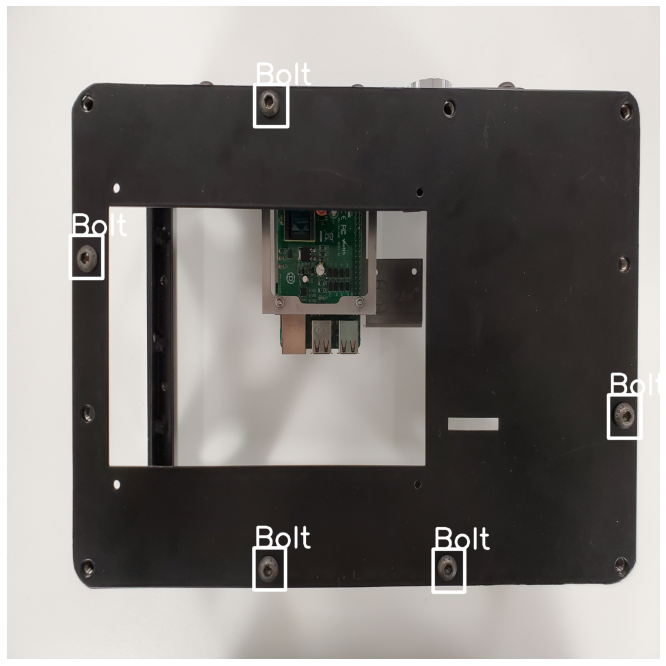

In [10]:
test_dataset.show_data(20)

In [11]:
bolt_module = BoltDataModule(df,
                             get_train_transforms(target_img_size=1024),
                             get_valid_transforms(target_img_size=1024),
                             num_workers=16,
                             batch_size=2)

65


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3024, 4032, 3)
torch.Size([3, 1024, 1024])


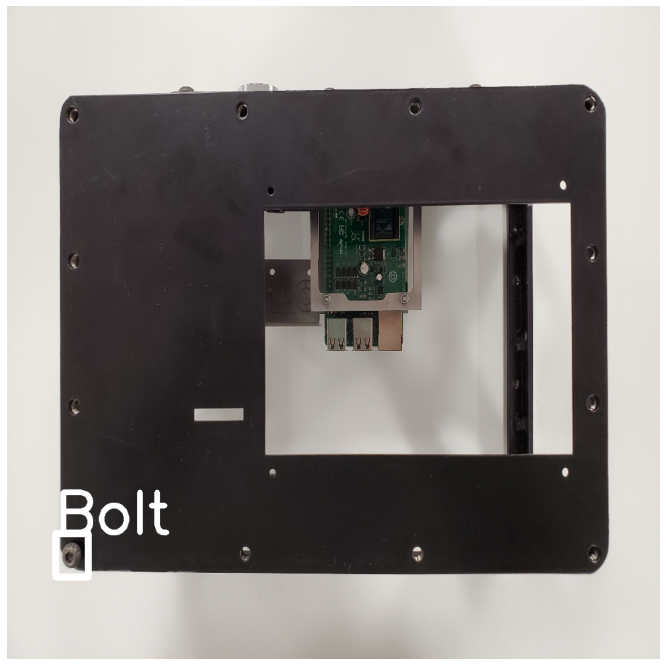

In [12]:
bolt_module.train_dataset().show_data(0)

In [13]:
loader = bolt_module.train_dataloader()

65


In [14]:
#images, targets, bolts = 
data = next(iter(loader))

In [15]:
data

[tensor([[[[1.6667, 1.6495, 1.6495,  ..., 1.8037, 1.7865, 1.7865],
           [1.6667, 1.6495, 1.6324,  ..., 1.8037, 1.8037, 1.8037],
           [1.6667, 1.6324, 1.7009,  ..., 1.8208, 1.8379, 1.8208],
           ...,
           [1.7180, 1.7352, 1.7352,  ..., 1.9920, 1.9064, 1.9407],
           [1.7523, 1.6838, 1.7009,  ..., 1.9407, 1.9920, 1.9920],
           [1.7694, 1.7009, 1.7180,  ..., 1.9407, 1.9749, 1.9235]],
 
          [[1.7458, 1.7633, 1.7633,  ..., 1.9209, 1.9034, 1.8683],
           [1.7808, 1.7458, 1.7458,  ..., 1.8859, 1.9034, 1.9384],
           [1.7458, 1.7283, 1.7808,  ..., 1.9384, 1.9209, 1.9034],
           ...,
           [1.8508, 1.8508, 1.8333,  ..., 2.0959, 2.0609, 2.0959],
           [1.8333, 1.8158, 1.8508,  ..., 2.0434, 2.0959, 2.0959],
           [1.8683, 1.8333, 1.8683,  ..., 2.0959, 2.0784, 2.0959]],
 
          [[1.9080, 1.9254, 1.8905,  ..., 2.0300, 2.0300, 1.9951],
           [1.9080, 1.9254, 1.9254,  ..., 2.0474, 1.9951, 2.0125],
           [1.9254, 1.89